In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("covtype.data", header=None)  # no header row


In [3]:
columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am ','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']+[f'Wilderness Areas_{i}'for i in range(1,5)]+[f'Soil_Type_{i}'for i in range (1,41)]+['Cover_Type']

In [4]:
df.columns=columns

In [5]:
df.shape

(581012, 55)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness Areas_1                  581012 non-null  int64
 11  Wilderness Areas_2                  581012 non-null 

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness Areas_1                    0
Wilderness Areas_2                    0
Wilderness Areas_3                    0
Wilderness Areas_4                    0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
df_sampled = df.sample(n=30000, random_state=42)
X = df_sampled.drop('Cover_Type', axis=1)
y = df_sampled['Cover_Type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)


In [13]:
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

In [14]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [63]:
print(" Random Forest :\n", classification_report(y_test, y_pred_rf))
print(" Decision Tree :\n", classification_report(y_test, y_pred_dt))

 Random Forest :
               precision    recall  f1-score   support

           1       0.84      0.84      0.84      2213
           2       0.88      0.82      0.85      2912
           3       0.78      0.87      0.82       366
           4       0.72      0.96      0.83        27
           5       0.45      0.78      0.57        95
           6       0.61      0.69      0.65       180
           7       0.80      0.91      0.85       207

    accuracy                           0.83      6000
   macro avg       0.73      0.84      0.77      6000
weighted avg       0.84      0.83      0.83      6000

 Decision Tree :
               precision    recall  f1-score   support

           1       0.77      0.77      0.77      2213
           2       0.83      0.76      0.80      2912
           3       0.75      0.84      0.80       366
           4       0.71      0.74      0.73        27
           5       0.35      0.75      0.47        95
           6       0.57      0.69      0.6

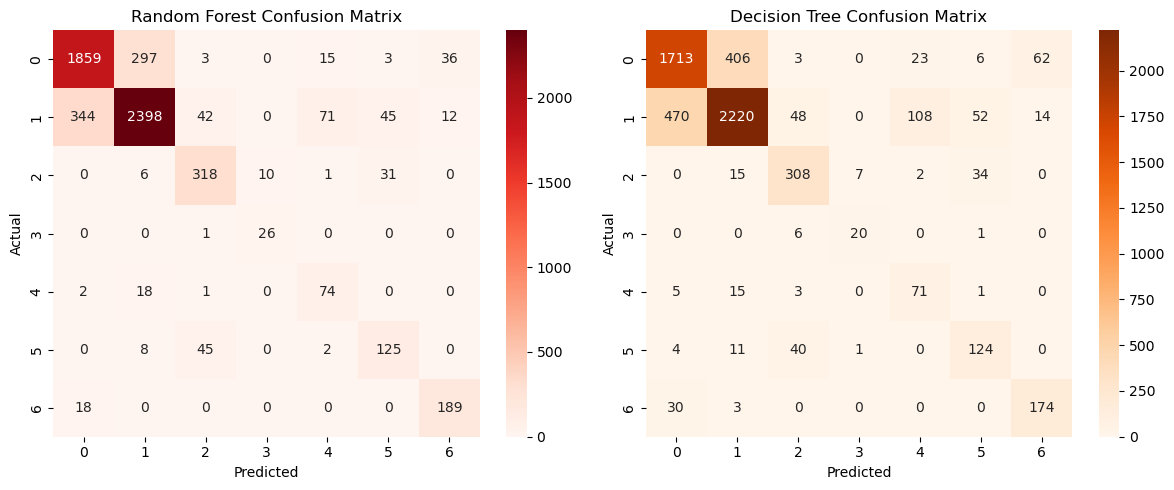

In [61]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted"), plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted"), plt.ylabel("Actual")
plt.tight_layout()
plt.show()

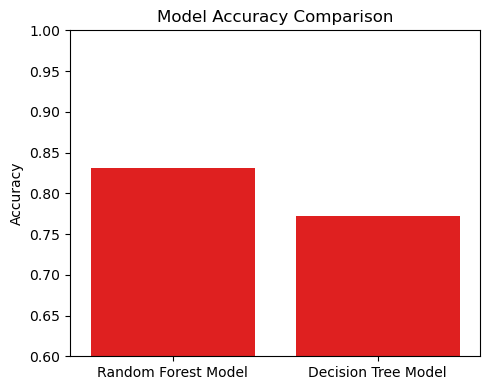

In [57]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_dt = accuracy_score(y_test, y_pred_dt)
plt.figure(figsize=(5, 4))
sns.barplot(x=["Random Forest Model", "Decision Tree Model"],color='Red', y=[acc_rf, acc_dt])
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [66]:
print(f" Random Forest Accuracy: {acc_rf:.4f}")
print(f" Decision Tree Accuracy: {acc_dt:.4f}")

 Random Forest Accuracy: 0.8315
 Decision Tree Accuracy: 0.7717


In [68]:
sample_input = X_test.iloc[[0]]
print("\n Sample Prediction:")
print(f"Random Forest ➜ Cover Type {rf.predict(sample_input)[0]}")
print(f"Decision Tree ➜ Cover Type {dt.predict(sample_input)[0]}")



 Sample Prediction:
Random Forest ➜ Cover Type 5
Decision Tree ➜ Cover Type 5
